# 6. Linear Systems 응용

선형 시스템을 풀어야 할 필요성은 다양한 분야에서 발생합니다. 선형 시스템의 예를 보여드리겠습니다. 또한 행렬 대수를 암호화와 그래프 이론에 적용하는 방법에 대해서도 설명합니다.

## Interpolation

보간은 알려진 값 사이에 있는 미지의 데이터 값을 추정하는 프로세스입니다.  이 프로세스에는 일반적으로 알려진 데이터 포인트 집합을 통해 곡선을 피팅하여 미지의 값을 예측하는 작업이 포함됩니다.  곡선은 일련의 매개변수로 설명되며, '곡선을 맞추는 것'은 곡선이 데이터를 가장 잘 나타내도록 매개변수를 선택하는 것을 의미합니다.  곡선을 맞추는 간단한 방법은 곡선이 제공된 모든 데이터를 통과하도록 하는 것입니다.  

데이터 포인트 $(2,8)$, $(5,12)$, $(6,14)$ 및 $(15,15)$를 예로 들어 보겠습니다.

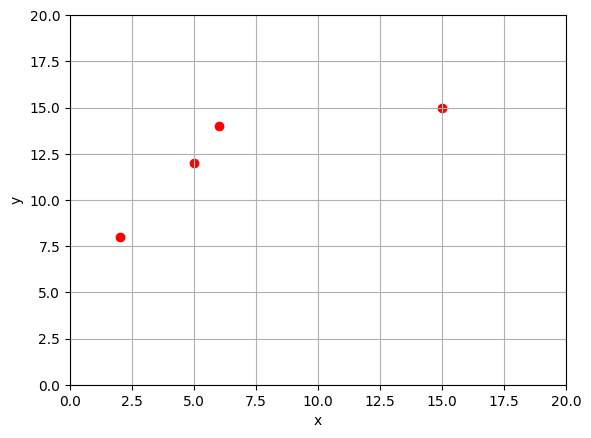

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import linear_solver as ls

x = np.array([2,5,6,15])
y = np.array([8,12,14,15])

fig,ax = plt.subplots()
ax.scatter(x,y,color='red');

ax.set_xlim(0,20);
ax.set_ylim(0,20);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.grid(True)

다항식은 보간에 사용되는 일반적인 곡선입니다.  이 경우 데이터 포인트가 4개이므로 그래프가 각 포인트를 통과하기 위해 충족해야 하는 방정식이 4개가 있습니다.  방정식을 만족하는 매개변수가 4개이므로 3차 다항식인 $P_3$을 선택합니다.

$$
\begin{matrix}
P_3(x) = a_0 + a_1x + a_2x^2 + a_3x^3
\end{matrix}
$$

데이터는 $P_3(2) = 8$, $P_3(5) = 12$, $P_3(6) = 14$, $P_3(15) = 15$의 네 가지 방정식을 제공합니다. 이 방정식 집합은 미지 계수에 대한 선형 시스템입니다.


$$
\begin{matrix}
a_0 + 2a_1 + 2^2a_2 + 2^3a_3 & = & 8\\
a_0 + 5a_1 + 5^2a_2 + 5^3a_3 & = & 12\\
a_0 + 6a_1 + 6^2a_2 + 6^3a_3 & = & 14\\
a_0 + 15a_1 + 15^2a_2 + 15^3a_3 & = & 15
\end{matrix}
$$

행렬 $A$와 오른쪽 벡터 $B$를 NumPy 배열로 조합합니다.

In [2]:
A = np.zeros((4,4))
B = np.zeros((4,1))

for i in range(4):
    B[i,0] = y[i]
    for j in range(4):
        A[i,j] = x[i]**(j)
        
print(A,'\n')
print(B)

[[1.000e+00 2.000e+00 4.000e+00 8.000e+00]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]] 

[[ 8.]
 [12.]
 [14.]
 [15.]]


이제 제거를 통해 $AX=B$ 시스템을 풀 수 있습니다.  x$ 변수와 혼동을 피하기 위해, 다항식의 계수를 나타내므로 해의 이름을 **coeffs**로 지정하겠습니다.

In [3]:
coeffs = ls.solve_system(A,B)
print(coeffs)

[[ 8.64102564]
 [-1.25555556]
 [ 0.52222222]
 [-0.02735043]]


마지막으로 데이터 위에 다항식 그래프를 그려서 적합도를 확인합니다.

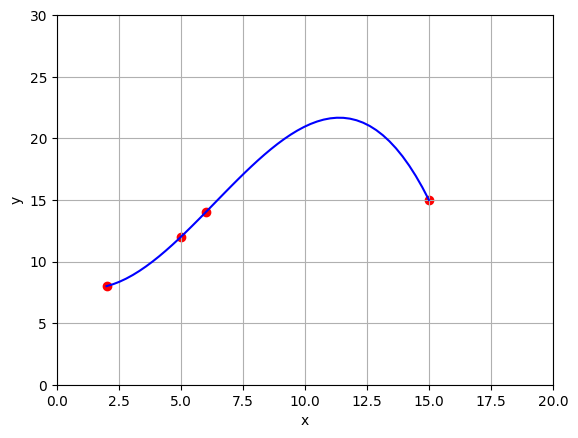

In [4]:
x_fit = np.linspace(x[0],x[3],50)
y_fit = coeffs[0] + coeffs[1]*x_fit + coeffs[2]*x_fit**2 + coeffs[3]*x_fit**3

fig,ax = plt.subplots()

ax.scatter(x,y,color='red');
ax.plot(x_fit,y_fit,'b');
ax.set_xlim(0,20);
ax.set_ylim(0,30);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.grid(True);

우리가 생성하는 곡선이 실제로 각 데이터 포인트를 통과하지만, 이 다항식은 기본 프로세스의 최상의 모델이 아닐 수 있습니다.  한 가지 잠재적인 우려는 곡선이 세 번째와 네 번째 데이터 요소를 직접 연결하는 것이 아니라 진동을 나타내는 것처럼 보인다는 것입니다.  데이터 포인트 집합에 맞는 곡선을 만들 때 단순히 곡선이 각 포인트를 통과하도록 하는 것보다 더 중요한 다른 요소가 있을 수 있습니다. 